                                      Projet detection des langues

# Importation et interpretation de dataset

In [1]:
#Importation des bibliothéques
import pandas as pd #analyse et manipulation des données
import re #regex
import seaborn as sns #data visualisation
#Importation de fichier CSV
data = pd.read_csv("c:/machinelearning/Language Detection.csv", delimiter=',')


In [2]:
#Affichage de 10 premiers lignes
data.head(10)

,Text,Language
0,"Nature, in the broadest sense, is the natural...",English
1,"""Nature"" can refer to the phenomena of the phy...",English
2,"The study of nature is a large, if not the onl...",English
3,"Although humans are part of nature, human acti...",English
4,[1] The word nature is borrowed from the Old F...,English
5,"[2] In ancient philosophy, natura is mostly us...",English
6,"[3][4] \nThe concept of nature as a whole, the...",English
7,During the advent of modern scientific method ...,English
8,"[5][6] With the Industrial revolution, nature ...",English
9,"However, a vitalist vision of nature, closer t...",English


In [3]:
#Affichage des 10 derniers lignes
data.tail(10)

,Text,Language
10327,ಗಾಡಿಯಲ್ಲಿ ಮನೆಯಲ್ಲಿ ನಾರ್ಸಿಸ್ ಅವಳು ಮನೆಗೆ ತಲುಪಿದಾ...,Kannada
10328,ಅವಳು ಮನೆಯಲ್ಲಿ ಕುಳಿತಿದ್ದ ತನ್ನ ತಾಯಿಯನ್ನು ತಬ್ಬಿಕೊ...,Kannada
10329,ಓಹ್ ತಾಯಿ ನಾನು ನಿನ್ನನ್ನು ತುಂಬಾ ಪ್ರೀತಿಸುತ್ತೇನೆ ಮ...,Kannada
10330,"ಅವನು ಸುಂದರವಾಗಿದ್ದನು, ಅವನು ನನ್ನ ಬಗ್ಗೆ ಅಷ್ಟಾಗಿ ಕ...",Kannada
10331,ಓಹ್ ಇಲ್ಲ ನೀವು ನೋಡಿದಾಗಿನಿಂದ ಇದು ಸರಿಯಾಗಿದೆ.,Kannada
10332,ನಿಮ್ಮ ತಪ್ಪು ಏನು ಬಂದಿದೆಯೆಂದರೆ ಆ ದಿನದಿಂದ ನಿಮಗೆ ಒ...,Kannada
10333,ನಾರ್ಸಿಸಾ ತಾನು ಮೊದಲಿಗೆ ಹೆಣಗಾಡುತ್ತಿದ್ದ ಮಾರ್ಗಗಳನ್...,Kannada
10334,ಹೇಗೆ ' ನಾರ್ಸಿಸಿಸಮ್ ಈಗ ಮರಿಯನ್ ಅವರಿಗೆ ಸಂಭವಿಸಿದ ಎ...,Kannada
10335,ಅವಳು ಈಗ ಹೆಚ್ಚು ಚಿನ್ನದ ಬ್ರೆಡ್ ಬಯಸುವುದಿಲ್ಲ ಎಂದು ...,Kannada
10336,ಟೆರ್ರಿ ನೀವು ನಿಜವಾಗಿಯೂ ಆ ದೇವದೂತನಂತೆ ಸ್ವಲ್ಪ ಕಾಣು...,Kannada


In [4]:
#Descritpion des données
data.describe()

,Text,Language
count,10337,10337
unique,10267,17
top,Jag är ledsen.,English
freq,3,1385


In [5]:
#Deduire depuis les données
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10337 entries, 0 to 10336
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Text      10337 non-null  object
 1   Language  10337 non-null  object
dtypes: object(2)
memory usage: 161.6+ KB


In [6]:
#compter les languages
data['Language'].value_counts()

English       1385
French        1014
Spanish        819
Portugeese     739
Italian        698
Russian        692
Sweedish       676
Malayalam      594
Dutch          546
Arabic         536
Turkish        474
German         470
Tamil          469
Danish         428
Kannada        369
Greek          365
Hindi           63
Name: Language, dtype: int64

In [7]:
#nb lignes et colonnes
data.shape

(10337, 2)

# Separation des données dependants et independants

In [8]:
#Separation des cases 
X = data["Text"] #independant (input)
y = data["Language"] #dependant (output)

# Nettoyage des données

Label Encoder (conversion numerique de l'output)

In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y) #rendre les langues numerotés 

Nettoyage de texte des mots indésirables

In [10]:
#créer une liste pour ajouter le texte prétraité
liste = []
#iteration de chaque texte
for text in X:
    # suppression des symboles et des chiffres
    text = re.sub(r'[!@#$(),n"%^*?:;~`0-9]', ' ', text)
    text = re.sub(r'[[]]', ' ', text)
    # convertir le texte en minuscule
    text = text.lower()
    
    liste.append(text)

C:\Users\khalil\AppData\Local\Temp/ipykernel_11840/3867094457.py:7: FutureWarning: Possible nested set at position 1
  text = re.sub(r'[[]]', ' ', text)


Conversion numérique de l'input

In [11]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(liste).toarray()
X.shape

(10337, 34937)

# Partie Modele

Train test split

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

Apprentissage de modele

In [13]:
from sklearn.naive_bayes import MultinomialNB #specialisée pour la classification
model = MultinomialNB()
model.fit(x_train, y_train) #apprentissage

MultinomialNB()

In [14]:
x_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [15]:
x_test

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [16]:
y_train

array([15, 12,  4, ..., 12,  3, 14])

In [17]:
y_test

array([ 5, 11,  2, ..., 10,  1,  4])

Prediction(test)

In [18]:
y_pred = model.predict(x_test) #test

# Evalution de modele

Evaluation avec accuracy

In [19]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
ac = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

In [20]:
print("Accuracy est :",ac)

Accuracy est : 0.9782398452611218


Visualisation de l'accuracy

<AxesSubplot:>

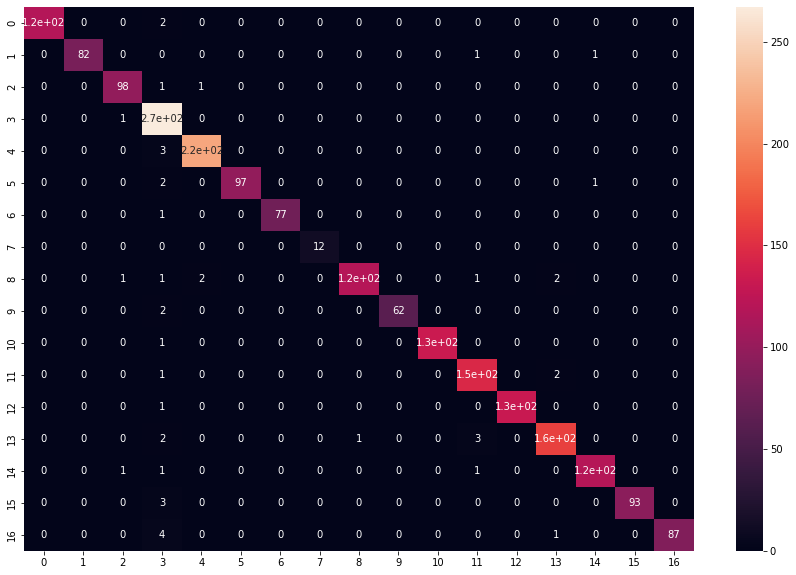

In [21]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
sns.heatmap(cm, annot = True)

-après la visualisation de la matrice de confusion de la précision, nous pouvons dire que la prédiction va très bien, nous pouvons conclure que la plupart des langues prennent leurs places aussi par cette visualisation nous comprenons que plus l'apparence d'une langue en terme de valeurs, plus la couleur est froide.

# la meilleure partie / prédiction 

tester le modèle avec différentes langues

In [30]:
def prediction(text):
    #conversion de text en des vecteurs
    x = cv.transform([text]).toarray()
    #prédire la langue
    lang = model.predict(x)
    #trouver la langue correspondant à la valeur prédite
    lang = le.inverse_transform(lang)
    #print de langage
    print("la langue est",lang[0])

In [32]:
prediction('')

la langue est Turkish
